In [1]:
"""let's now take our original dataset and focus only on statiscian"""

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load data
rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")

# Clean data
rf["date"] = pd.to_datetime(rf["date"])
rf["skills_list"] = rf["skills_list"].apply(
    lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills
)

# Filter for Stastician job title

stat = rf[rf["job_title"] == "Statistician"].copy()

In [2]:


"""now let's back to the exercise with trending skills"""

# create a new column for month number
stat["month_num"] = rf["date"].dt.month
# explode the skills_list and pivot
stat_explode = stat.explode("skills_list")
"""we may use fill_value =0 in order to fill out the Nah values"""
pivot_explode = stat_explode.pivot_table(index="month_num",columns="skills_list",aggfunc="size", fill_value=0)

# sort the skills by count
pivot_explode.loc["Total"] = pivot_explode.sum()
pivot_furth = pivot_explode[pivot_explode.loc["Total"].sort_values(ascending=False).index]
pivot_furth = pivot_furth.drop("Total")



# use month names for plotting 

pivot_furth = pivot_furth.reset_index()
# new column
pivot_furth["month_ABC"] = pivot_furth["month_num"].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%b"))
pivot_furth = pivot_furth.set_index("month_ABC")
pivot_furth = pivot_furth.drop(columns="month_num")
pivot_furth 



skills_list,Probability,Regression,SAS,Data Analysis,Python,R,Data Cleaning,Machine Learning,Statistics
month_ABC,,,,,,,,,
Jan,1,1,1,0,0,0,0,0,0
Feb,1,1,1,0,0,0,1,1,1
Mar,0,0,0,1,1,1,0,0,0
Jul,2,2,2,0,0,0,0,0,0
Sep,1,1,1,1,1,1,0,0,0
Nov,0,0,0,1,1,1,0,0,0
Dec,0,0,0,0,0,0,1,1,1


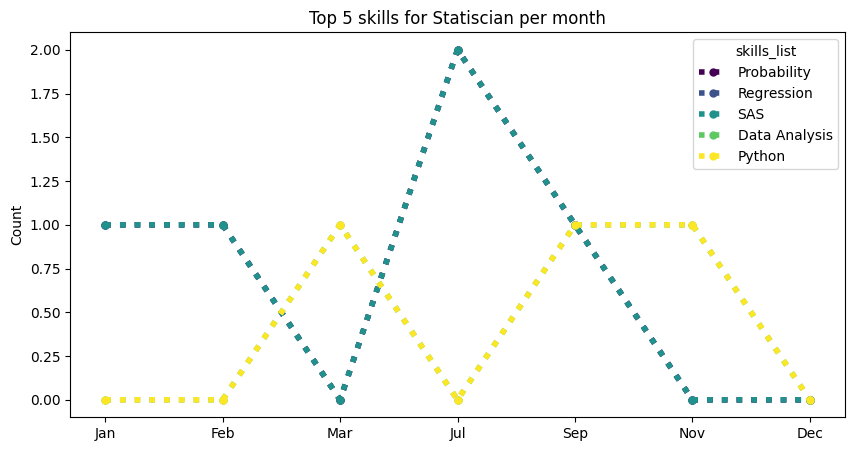

In [40]:
# plotting
pivot_furth.iloc[:,:5]
# pivot_furth.iloc[:,:5].plot(kind="line")
"""let's now custimize it more"""
pivot_furth.iloc[:,:5].plot(
    kind="line",
    linewidth = 4,
    linestyle=":", #options are:"-", "--", "-.", ":"
    colormap = "viridis",
    marker="o", #options: o, x, +, *, s, 1,2,3,4, "." , "."
    markersize=5,
    # fig size which specifies width along with height """
    figsize=(10,5)
    )
plt.xlabel("")
plt.ylabel("Count")
plt.title("Top 5 skills for Statiscian per month")
plt.show()

Let's now move on to the scatter plot 
